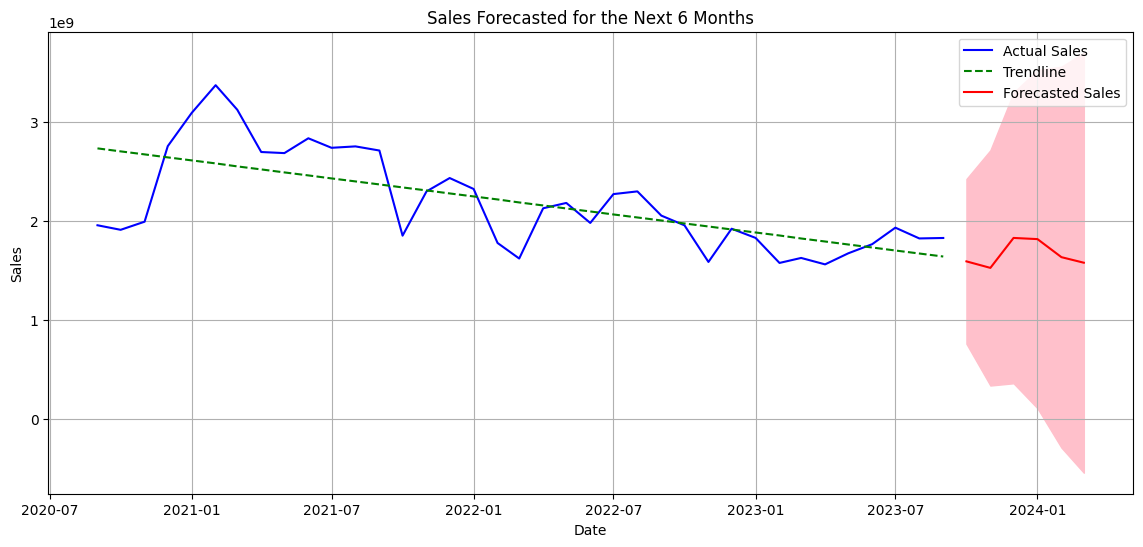

2023-10-01    1.593198e+09
2023-11-01    1.527437e+09
2023-12-01    1.829977e+09
2024-01-01    1.818097e+09
2024-02-01    1.635751e+09
2024-03-01    1.579574e+09
Freq: MS, Name: predicted_mean, dtype: float64

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import numpy as np
warnings.filterwarnings("ignore")

df = pd.read_csv('sales2023.csv')

df['sales'] = df['sales'].str.replace(',', '').astype(float)

df['dates'] = pd.to_datetime(df['dates'], format='%m/%d/%Y')
df.set_index('dates', inplace=True)

order = (1, 1, 1) 
seasonal_order = (1, 1, 1, 12)

model = SARIMAX(df['sales'], order=order, seasonal_order=seasonal_order)
results = model.fit()

forecast_steps = 6
forecast = results.get_forecast(steps=forecast_steps)

forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

trendline = np.polyfit(np.arange(len(df['sales'])), df['sales'], 1)
trend_values = np.polyval(trendline, np.arange(len(df['sales'])))

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['sales'], label='Actual Sales', color='blue')
plt.plot(df.index, trend_values, label='Trendline', color='green', linestyle='--')
plt.plot(forecasted_values.index, forecasted_values, label='Forecasted Sales', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
plt.title('Sales Forecasted for the Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
forecasted_values